In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# for EDA
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split

# for KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# for Hierarcical
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from sklearn.cluster import DBSCAN

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

C:\Users\clive\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_excel("Assignment_round_PS.xlsx")

In [3]:
df

,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Zip,Billing Province,Billing Country,Shipping Zip,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number
0,#96568,paid,2020-10-12 14:22:07 +0100,unfulfilled,NaN,no,GBP,9.99,0.0,1.67,9.99,NaN,0.00,Standard delivery,2020-10-12 14:22:06 +0100,1,Focus1 Foam and Fiber Filter - N/a,9.99,NaN,SC15824N04,True,True,pending,WS137NL,NaN,GB,WS137NL,NaN,GB,NaN,NaN,NaN,Shopify Payments,c15081125314711.1,0.00,Swan,0.0,NaN,NaN,NaN,2.846770e+12,NaN,Low,web,0,GB VAT 20%,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#96567,paid,2020-10-12 14:17:46 +0100,unfulfilled,NaN,no,GBP,179.99,0.0,30.00,179.99,NaN,0.00,Standard delivery,2020-10-12 14:17:44 +0100,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,NaN,SC15820N,True,True,pending,HP19 9QT,NaN,GB,HP19 9QT,NaN,GB,NaN,NaN,NaN,Shopify Payments,c15081086582935.1,0.00,Swan,0.0,NaN,NaN,NaN,2.846760e+12,NaN,Low,web,0,GB VAT 20%,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#96566,paid,2020-10-12 14:11:13 +0100,unfulfilled,NaN,no,GBP,71.99,0.0,12.00,71.99,GREEDY20,17.99,Standard delivery,2020-10-12 14:11:12 +0100,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,NaN,ST14610GRYN,True,True,pending,HR2 7ZH,NaN,GB,HR2 7ZH,NaN,GB,NaN,NaN,NaN,Pay over time with Klarna,c15081046933655.1,0.00,Swan,0.0,NaN,NaN,NaN,2.846750e+12,"Klarna Payments, slice_it_pay_over_time_with_k...",Low,web,0,GB VAT 20%,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#96566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-12 14:11:12 +0100,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,NaN,SK14610GRYN,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#96565,paid,2020-10-12 14:05:34 +0100,unfulfilled,NaN,no,GBP,14.99,0.0,2.50,14.99,NaN,0.00,Standard delivery,2020-10-12 14:05:33 +0100,1,Focus1 Filter Screen - N/a,14.99,NaN,SC15824N010,True,True,pending,MK14 7BB,NaN,GB,MK14 7BB,NaN,GB,NaN,NaN,NaN,Shopify Payments,c15081018458263.1,0.00,Swan,0.0,NaN,NaN,NaN,2.846740e+12,NaN,Low,web,0,GB VAT 20%,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118895,#1088,paid,2016-03-30 09:53:46 +0100,fulfilled,2016-03-31 09:25:36 +0100,yes,GBP,19.98,0.0,3.33,19.98,NaN,0.00,Free delivery,2016-03-30 09:53:46 +0100,2,Focus1 Anti Calc Cartridge - None - SI11010N001,9.99,9.99,SI11010N001,True,True,fulfilled,KT20 6JF,NaN,GB,KT20 6JF,NaN,GB,NaN,NaN,NaN,PayPal Express Checkout,c6793771975.1,0.00,Swan,0.0,NaN,NaN,NaN,2.795784e+09,NaN,Low,web,0,VAT 20%,3.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118896,#1087,paid,2016-03-29 23:06:57 +0100,fulfilled,2016-03-31 09:25:34 +0100,yes,GBP,14.99,0.0,2.50,14.99,NaN,0.00,Free delivery,2016-03-29 23:06:57 +0100,1,Focus1 Water tank - None - SI11010N002,14.99,14.99,SI11010N002,True,True,fulfilled,GU12EB,NaN,GB,GU12EB,NaN,GB,NaN,NaN,NaN,Shopify Payments,c6789629831.1,0.00,Swan,0.0,NaN,NaN,NaN,2.791239e+09,NaN,Low,web,0,VAT 20%,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118897,#1086,paid,2016-03-29 20:16:08 +0100,fulfilled,2016-03-31 17:25:35 +0100,yes,GBP,9.99,0.0,1.67,9.99,NaN,0.00,Free delivery,2016-03-29 20:16:08 +0100,1,Foc

In [4]:
df.shape

(118900, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118900 entries, 0 to 118899
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         118900 non-null  object 
 1   Financial Status             95484 non-null   object 
 2   Paid at                      93972 non-null   object 
 3   Fulfillment Status           95484 non-null   object 
 4   Fulfilled at                 85245 non-null   object 
 5   Accepts Marketing            95484 non-null   object 
 6   Currency                     95484 non-null   object 
 7   Subtotal                     95484 non-null   float64
 8   Shipping                     95484 non-null   float64
 9   Taxes                        95484 non-null   float64
 10  Total                        95484 non-null   float64
 11  Discount Code                62031 non-null   object 
 12  Discount Amount              95484 non-null   float64
 13 

In [6]:
df.isnull().sum()

Name                                0
Financial Status                23416
Paid at                         24928
Fulfillment Status              23416
Fulfilled at                    33655
Accepts Marketing               23416
Currency                        23416
Subtotal                        23416
Shipping                        23416
Taxes                           23416
Total                           23416
Discount Code                   56869
Discount Amount                 23416
Shipping Method                 23416
Created at                          0
Lineitem quantity                   0
Lineitem name                       0
Lineitem price                      0
Lineitem compare at price       21688
Lineitem sku                        0
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing Zip                     23464
Billing Province               118592
Billing Country                 23417
Shipping Zip

In [7]:
# display the total number of null values in each column of dataframe

# 'ascending = False' sorts values in the descending order
Total = df.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data


,Total,Percent
Receipt Number,118900,100.000000
Tax 4 Name,118900,100.000000
Note Attributes,118900,100.000000
Shipping Province,118900,100.000000
Tax 2 Value,118900,100.000000
Tax 3 Name,118900,100.000000
Tax 3 Value,118900,100.000000
Tax 2 Name,118900,100.000000
Tax 4 Value,118900,100.000000
Tax 5 Name,118900,100.000000


In [8]:
# Removing top null columns Till Discount

In [9]:
df=df.drop(['Receipt Number',
'Tax 4 Name',
'Note Attributes',
'Shipping Province',
'Tax 2 Value',
'Tax 3 Name',
'Tax 3 Value',
'Tax 2 Name',
'Tax 4 Value',
'Tax 5 Name',
'Tax 5 Value',
'Employee',
'Location',
'Device ID',
'Notes',
'Billing Province',
'Cancelled at',
'Phone',
'Tags',
'Discount Code'],axis=1)

In [10]:
# display the total number of null values in each column of dataframe

# 'ascending = False' sorts values in the descending order
Total = df.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data


,Total,Percent
Fulfilled at,33655,28.305299
Paid at,24928,20.965517
Payment Reference,23475,19.743482
Tax 1 Name,23470,19.739277
Tax 1 Value,23470,19.739277
Billing Zip,23464,19.734230
Payment Method,23436,19.710681
Billing Country,23417,19.694701
Accepts Marketing,23416,19.693860
Currency,23416,19.693860


In [11]:
df.shape

(118900, 37)

In [12]:
df.isnull().sum()/len(df)*100

Name                            0.000000
Financial Status               19.693860
Paid at                        20.965517
Fulfillment Status             19.693860
Fulfilled at                   28.305299
Accepts Marketing              19.693860
Currency                       19.693860
Subtotal                       19.693860
Shipping                       19.693860
Taxes                          19.693860
Total                          19.693860
Discount Amount                19.693860
Shipping Method                19.693860
Created at                      0.000000
Lineitem quantity               0.000000
Lineitem name                   0.000000
Lineitem price                  0.000000
Lineitem compare at price      18.240538
Lineitem sku                    0.000000
Lineitem requires shipping      0.000000
Lineitem taxable                0.000000
Lineitem fulfillment status     0.000000
Billing Zip                    19.734230
Billing Country                19.694701
Shipping Zip    

In [13]:
df.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Amount', 'Shipping Method', 'Created at',
       'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Zip', 'Billing Country',
       'Shipping Zip', 'Shipping Country', 'Payment Method',
       'Payment Reference', 'Refunded Amount', 'Vendor', 'Outstanding Balance',
       'Id', 'Risk Level', 'Source', 'Lineitem discount', 'Tax 1 Name',
       'Tax 1 Value'],
      dtype='object')

In [14]:
df['Lineitem quantity'].value_counts()

1     116499
2       2148
3        147
4         52
5         13
7         10
6          9
8          5
15         4
10         3
14         2
20         2
11         1
12         1
9          1
16         1
18         1
37         1
Name: Lineitem quantity, dtype: int64

In [15]:
df.shape

(118900, 37)

In [16]:
df['Lineitem quantity'].value_counts()

1     116499
2       2148
3        147
4         52
5         13
7         10
6          9
8          5
15         4
10         3
14         2
20         2
11         1
12         1
9          1
16         1
18         1
37         1
Name: Lineitem quantity, dtype: int64

In [17]:
#q1=data.quantile(0.25)
#q3=data.quantile(0.75)
#iqr=q3-q1

#print('Shape before Outlier Treatment :',data.shape)

#data = data[~((data < (q1-(iqr*1.5))) | (data > (q3+(iqr*1.5)))).any(axis=1)].reset_index(drop=True)

#print('Shape before Outlier Treatment :',data.shape)

## Thus, all outliers have been treated.

In [18]:
df.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping',
       'Taxes', 'Total', 'Discount Amount', 'Shipping Method', 'Created at',
       'Lineitem quantity', 'Lineitem name', 'Lineitem price',
       'Lineitem compare at price', 'Lineitem sku',
       'Lineitem requires shipping', 'Lineitem taxable',
       'Lineitem fulfillment status', 'Billing Zip', 'Billing Country',
       'Shipping Zip', 'Shipping Country', 'Payment Method',
       'Payment Reference', 'Refunded Amount', 'Vendor', 'Outstanding Balance',
       'Id', 'Risk Level', 'Source', 'Lineitem discount', 'Tax 1 Name',
       'Tax 1 Value'],
      dtype='object')

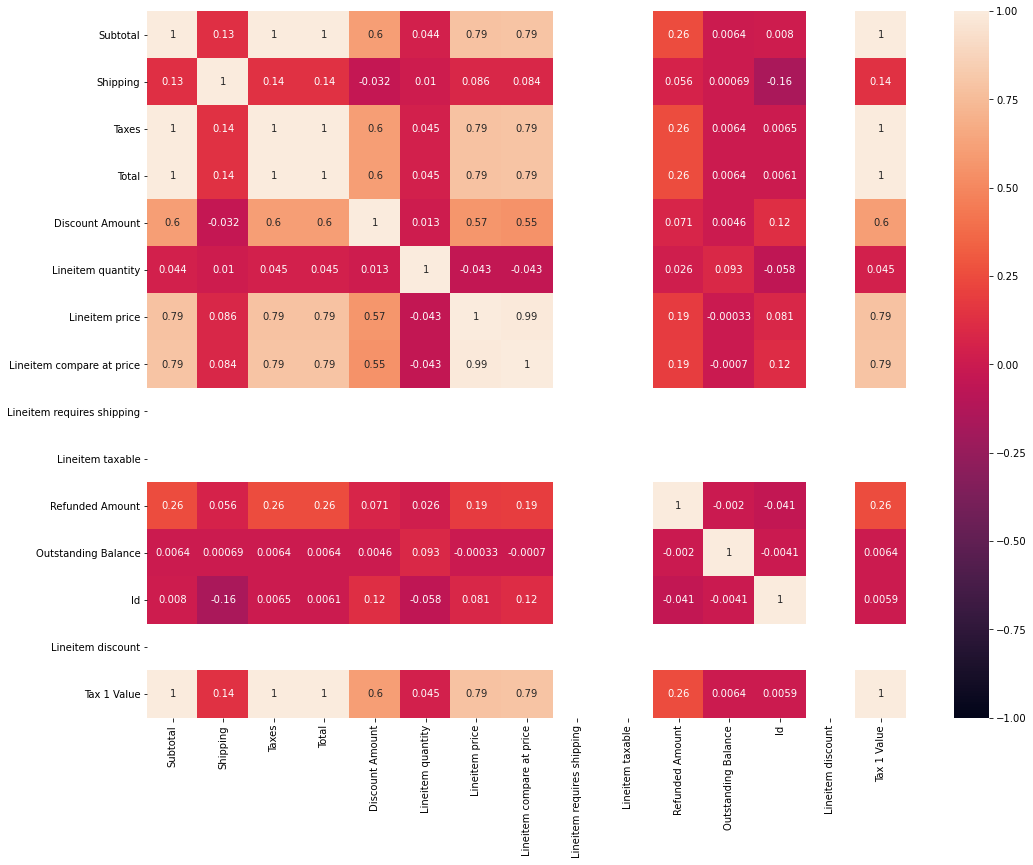

In [19]:
plt.figure(figsize=(17,13))
sns.heatmap(df.corr(),annot=True,vmin=-1)
plt.show()

In [20]:
# The unique values of these 2 variables (Description & StockCode) should be equal, because each stock code represents a product.

# 1st Step

In [21]:
df_product = df[["Lineitem name","Lineitem sku"]].drop_duplicates()
df_product = df_product.groupby(["Lineitem name"]).agg({"Lineitem sku":"count"}).reset_index()

In [22]:
df_product.rename(columns={'Lineitem sku':'StockCode_Count'},inplace=True)
df_product.head(10)

,Lineitem name,StockCode_Count
0,Brush Roll,1
1,Cover Filter,1
2,Fearne By Focus1 Baking Triple Pack - Lily - S...,1
3,Fearne By Focus1 Baking Triple Pack - Pale Hon...,1
4,Fearne By Focus1 Baking Triple Pack - Peacock ...,1
5,Fearne By Focus1 Baking Triple Pack - Truffle ...,1
6,Fearne By Focus1 Christmas Baking Bundle - Tru...,1
7,Fearne by Focus1 2 Piece Loaf Tin set - Grey -...,1
8,Fearne by Focus1 2 Slice Toaster - Lily - ST20...,1
9,Fearne by Focus1 2 Slice Toaster - Pale Honey ...,1


In [23]:
df_product = df_product.sort_values("StockCode_Count", ascending=False)
df_product = df_product[df_product["StockCode_Count"]>1]

df_product.head()

,Lineitem name,StockCode_Count
660,Focus1 Fridge Door Bottle Shelf - N/a,5
839,Focus1 Refrigerator Glass Shelf - N/a,4
834,Focus1 Refrigerator Door Seal White - White,3
675,Focus1 Fridge Door Upper Shelf - N/a,3
555,Focus1 Anti Calc Cartridge - None,3


In [24]:
# Let's delete products with more than one stock code 

df = df[~df["Lineitem name"].isin(df_product["Lineitem name"])]

print(df["Lineitem sku"].nunique())
print(df["Lineitem name"].nunique())

908
1313


In [25]:
# 2nd Step
df_product = df[["Lineitem name","Lineitem sku"]].drop_duplicates()
df_product = df_product.groupby(["Lineitem sku"]).agg({"Lineitem name":"count"}).reset_index()
df_product.rename(columns={'Lineitem name':'Description_Count'},inplace=True)
df_product = df_product.sort_values("Description_Count", ascending=False)
df_product = df_product[df_product["Description_Count"] > 1]

In [26]:
df_product.head()

,Lineitem sku,Description_Count
843,SWKA4500GN01,4
895,SWPS5020RN,3
187,SI9032N002,3
894,SWPS5020PN,3
125,SFA12620GRN,3


In [27]:
# Let's delete stock codes that represent multiple products
df = df[~df["Lineitem sku"].isin(df_product["Lineitem sku"])]

In [28]:
# Now each stock code represents a single product
print(df["Lineitem sku"].nunique())
print(df["Lineitem name"].nunique())

537
537


In [29]:
df['TotalPrice'] = df['Lineitem quantity'] * df['Lineitem price']

In [30]:
df.head()

,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Zip,Billing Country,Shipping Zip,Shipping Country,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Id,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,TotalPrice
5,#96564,paid,2020-10-12 13:56:33 +0100,unfulfilled,NaN,no,GBP,28.0,0.0,4.67,28.0,6.99,Standard delivery,2020-10-12 13:56:32 +0100,1,Focus1 Portable Garment Steamer - Grey,34.99,NaN,SI12022N,True,True,pending,IV2 5GR,GB,IV2 5GR,GB,PayPal Express Checkout,c15080958722199.1,0.0,Swan,0.0,2.846720e+12,Low,web,0,GB VAT 20%,4.67,34.99
39,#96537,paid,2020-10-12 13:05:15 +0100,unfulfilled,NaN,no,GBP,28.0,0.0,4.67,28.0,6.99,Standard delivery,2020-10-12 13:05:11 +0100,1,Focus1 Portable Garment Steamer - Grey,34.99,NaN,SI12022N,True,True,pending,PE10 0DY,GB,PE10 0DY,GB,PayPal Express Checkout,c15080645656727.1,0.0,Swan,0.0,2.846650e+12,Low,web,0,GB VAT 20%,4.67,34.99
77,#96503,paid,2020-10-12 11:52:20 +0100,unfulfilled,NaN,no,GBP,28.0,0.0,4.67,28.0,6.99,Standard delivery,2020-10-12 11:52:19 +0100,1,Focus1 Portable Garment Steamer - Grey,34.99,NaN,SI12022N,True,True,pending,SR8 2NW,GB,SR8 2NW,GB,PayPal Express Checkout,c15080243593367.1,0.0,Swan,0.0,2.846550e+12,Low,web,0,GB VAT 20%,4.67,34.99
97,#96488,paid,2020-10-12 11:37:40 +0100,unfulfilled,NaN,no,GBP,80.0,0.0,13.33,80.0,19.99,Standard delivery,2020-10-12 11:37:39 +0100,1,Focus1 Dirtmaster Carpet Washer - Black,99.99,NaN,SC17310N,True,True,pending,GU46 6JQ,GB,GU46 6JQ,GB,Shopify Payments,c15080133820567.1,0.0,Swan,0.0,2.846530e+12,Low,web,0,GB VAT 20%,13.33,99.99
119,#96468,paid,2020-10-12 11:06:03 +0100,unfulfilled,NaN,no,GBP,28.0,0.0,4.67,28.0,6.99,Standard delivery,2020-10-12 11:06:02 +0100,1,Focus1 Portable Garment Steamer - Grey,34.99,NaN,SI12022N,True,True,pending,SP13RE,GB,SP13RE,GB,PayPal Express Checkout,c15079969751191.1,0.0,Swan,0.0,2.846490e+12,Low,web,0,GB VAT 20%,4.67,34.99


In [31]:
df['Paid at'] = pd.to_datetime(df['Paid at'], infer_datetime_format=True,utc=True)


In [32]:
# Let's observe the last transaction date.
# So we can determine the performans/measurement date for calculating how recent a customer's latest purchase was.
df['InvoiceDate'] = pd.to_datetime(df['Paid at'])
df['InvoiceDate'].max()

Timestamp('2020-10-12 12:56:33+0000', tz='UTC')

In [33]:
# Assign "performans_date" as 2 days after the last transaction date of purchase:
from datetime import datetime, timedelta

performans_date = df["InvoiceDate"].max() + timedelta(days=2)
performans_date

Timestamp('2020-10-14 12:56:33+0000', tz='UTC')



Let's create a new df called as rfm_df by calculating the Recency, Frequency and Monetary values.

    Recency : the number of days between performans_date and the last purchase date of each customers
    Frequency: the number of transactions (unique invoices) of each customers
    Monetary : the sum of TotalPrice of each customers.



In [34]:
rfm= df.groupby('Id').agg({'InvoiceDate': lambda InvoiceDate: (performans_date - InvoiceDate.max()).days,
                                    'Name': lambda num: len(num),
                                    'TotalPrice': lambda price: price.sum()})

In [35]:
rfm.head()

,InvoiceDate,Name,TotalPrice
Id,,,
2.739127e+09,1666.0,1,9.99
2.795784e+09,1659.0,1,19.98
2.796532e+09,1659.0,1,29.98
2.797054e+09,1659.0,1,14.99
2.797567e+09,1658.0,1,9.99


In [36]:
rfm.shape

(17909, 3)

In [37]:
## Replace column names with Recency, Frequency and Monetary:
rfm.columns = ['recency', 'frequency', 'monetary']

rfm.head()

,recency,frequency,monetary
Id,,,
2.739127e+09,1666.0,1,9.99
2.795784e+09,1659.0,1,19.98
2.796532e+09,1659.0,1,29.98
2.797054e+09,1659.0,1,14.99
2.797567e+09,1658.0,1,9.99


In [38]:
rfm.isnull().sum()

recency      269
frequency      0
monetary       0
dtype: int64

In [39]:
rfm=rfm.dropna()

In [40]:
rfm.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

In [41]:
#Recency with a decreasing range of 4 through 1

r_labels = range(4, 0, -1)  # create generators 

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(rfm['recency'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
rfm['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
print(rfm.sort_values('recency'))    

              recency  frequency  monetary Recency_Quartile
Id                                                         
2.846720e+12      2.0          1     34.99                4
2.845140e+12      2.0          1     34.99                4
2.845040e+12      2.0          1     34.99                4
2.845030e+12      2.0          1     34.99                4
2.845010e+12      2.0          1     34.99                4
...               ...        ...       ...              ...
2.797567e+09   1658.0          1      9.99                1
2.797054e+09   1659.0          1     14.99                1
2.796532e+09   1659.0          1     29.98                1
2.795784e+09   1659.0          1     19.98                1
2.739127e+09   1666.0          1      9.99                1

[17640 rows x 4 columns]


So can check most recent has assigned 1 status in Recency_Quartile and least recent has status of 0(more depends on the business goal)

In [42]:
# Creating Frequency and Monetary quartiles  and Create labels for Frequency and monetray
f_labels = range(1,5)
m_labels = range(1,5)

#Assign these labels to 4 equal percentile groups based on Frequency.
f_quartiles = pd.qcut(rfm['frequency'].rank(method="first"), 4, labels = f_labels)

## Assign these labels to 4 equal percentile groups
m_quartiles = pd.qcut(rfm['monetary'], 4, labels = m_labels)

#Create new columns F and M

rfm = rfm.assign(F = f_quartiles.values)
rfm = rfm.assign(M = m_quartiles.values)

In [43]:
rfm.head()

,recency,frequency,monetary,Recency_Quartile,F,M
Id,,,,,,
2.739127e+09,1666.0,1,9.99,1,1,1
2.795784e+09,1659.0,1,19.98,1,1,2
2.796532e+09,1659.0,1,29.98,1,1,2
2.797054e+09,1659.0,1,14.99,1,1,1
2.797567e+09,1658.0,1,9.99,1,1,1


In [44]:
def join_rfm(x): return str(x['Recency_Quartile']) + str(x['F']) + str(x['M'])

In [47]:
#group the customers into three separate groups based on Recency,Frequency and monetary values

rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

#Sum RFM quartiles values to RFM_Score

rfm['RFM_Score'] = rfm[['Recency_Quartile','F','M']].sum(axis=1)

In [48]:
rfm.head()

,recency,frequency,monetary,Recency_Quartile,F,M,RFM_Segment,RFM_Score
Id,,,,,,,,
2.739127e+09,1666.0,1,9.99,1,1,1,111,3
2.795784e+09,1659.0,1,19.98,1,1,2,112,4
2.796532e+09,1659.0,1,29.98,1,1,2,112,4
2.797054e+09,1659.0,1,14.99,1,1,1,111,3
2.797567e+09,1658.0,1,9.99,1,1,1,111,3


So with final Results having 2 new columns : RFM_Segment (combine RFM value is RFM_segment) & RFM_Score is addition of RFM_segment for eg.(1+1+1):3 is RFM_score

In [49]:
# Analyzing RFM segments : Largest 10 RFM segments

rfm.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    1892
443    1688
111    1569
222    1547
332    1477
221    1371
113    1212
112    1186
334    1152
331    1040
dtype: int64

In [53]:
#Summary metrics per RFM Score

rfm.groupby('RFM_Score').agg({'recency': 'mean','frequency': 'mean','monetary': ['mean', 'count'] }).round(1)

recency frequency monetary      
             mean      mean     mean count
RFM_Score                                 
3          1420.0       1.0     13.2  1569
4          1353.4       1.0     25.8  1186
5          1094.0       1.0     27.4  2583
6          1010.3       1.0     54.2  1998
7           649.6       1.0     26.4  1958
8           530.4       1.0     63.6  2064
9           257.3       1.1     27.6  1028
10          315.2       1.1    177.8  1405
11           78.9       1.1     63.2  1957
12           66.2       2.5    164.6  1892



    Each mean RFM value is better with higher RFM score

    For example with RFM_Score of 12.0 ,recency mean is 66.2 ,Frequecy mean 2.5 and Monetrary value 164.6

    So to conclude those who have high frequency mean have high Monetrary value and higher RFM_Score and and less mean of Recency.

    Therefore high RFM_score,very recent and high monetary value

    Now grouping into named segments finally.

    Creating custom segments based on RFM score.

    Creating a function to build segmentation and then assign it to each customer.



In [54]:
#Use RFM score to group customers into Gold, Silver and Bronze segments.

def segment_me(df):
    if df['RFM_Score'] >= 9:
       return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
       return 'Silver'
    else:
       return 'Bronze'

In [55]:
# Create a new variable called Segment_Level

rfm['Segment_level'] = rfm.apply(segment_me, axis=1)

In [57]:
#Analyze average values of Recency, Frequency and MonetaryValue for the custom segments created.

rfm.groupby('Segment_level').agg({'recency': 'mean','frequency': 'mean','monetary': ['mean', 'count']}).round(1)

recency frequency monetary      
                 mean      mean     mean count
Segment_level                                 
Bronze         1391.3       1.0     18.6  2755
Gold            157.1       1.5    113.5  6282
Silver          838.2       1.0     42.1  8603

So by analyzing custom segments with different segement level with mean of RFM values can check in Gold segment customer has lowest mean of Recency (latest recency) and highest mean value frequency and Monetary.

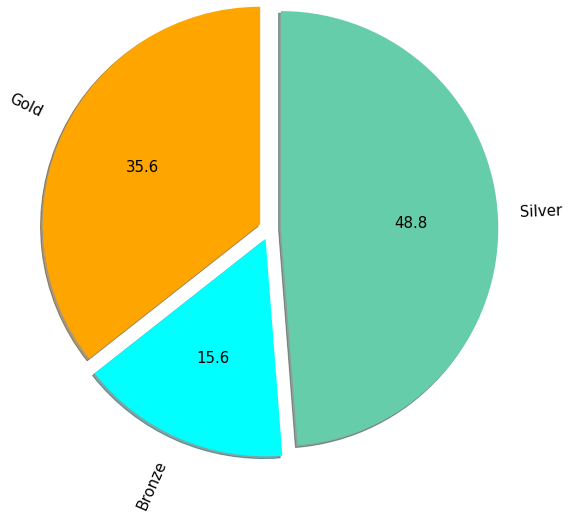

In [59]:
plt.figure(figsize=(5,5))
colors  = ("orange", "cyan", "mediumaquamarine")
explodes = [0.10, 0.10, 0.10]

rfm["Segment_level"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 15}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");



Assigning RFM Scores

    RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category whereas for Receny score, this is the opposite, because the most valueable customer is that has recently made purchasing so Recency score is labeled as 1.

    The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score should be given as 5 to represent best customers.



Recommendations:

Based on the above R-F-M score, we can give some Recommendations.
Gold customers : We can Reward them for their multiples purchases. They can be early adopters to very new products. Suggest them “Refer a friend”. Also, they can be the most loyal customers that have the habit to order.

BRONZE CUSTOMERS	: Send them personalized emails/messages/notifications to encourage them to order.



Silver Customers: Create loyalty cards in which they can gain points each time of purchasing and these points could transfer into a discount

This is how we can target a customer based on the customer segmentation which will help in marketing campaigns. Thus saving marketing costs, grab the customer, make customers spend more thereby increasing the revenue.